In [1]:
import tensorflow as tf
import os 

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)
    

In [3]:
import cv2
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import imghdr

from matplotlib import pyplot as plt
import numpy as np

In [4]:
import cv2

img_path = r"C:\Users\prach\Downloads\ai-v-real-master\ai-v-real-master\data\FAKE\1000 (2).jpg"
img = cv2.imread(img_path)

if img is not None:
    print("Image shape:", img.shape)
else:
    print("Failed to load image. Check the path:", img_path)

Image shape: (32, 32, 3)


In [9]:
#LOADING THE DATA
data_dir = r"C:\Users\prach\Downloads\ai-v-real-master\ai-v-real-master\data"
data = tf.keras.utils.image_dataset_from_directory(data_dir, image_size=(32, 32))

Found 100000 files belonging to 2 classes.


In [11]:
data_it = data.as_numpy_iterator()

In [13]:
batch = data_it.next()

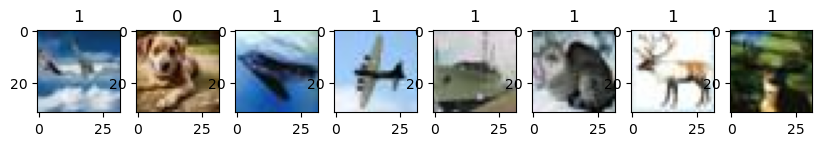

In [15]:
fig, ax = plt.subplots(ncols=8, figsize=(10, 10))
for idx, img in enumerate(batch[0][:8]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [17]:
#PREPROCESSING

In [19]:
print(batch[0].min())
print(batch[0].max())

0.0
255.0


In [21]:
#SCALING THE DATA BETWEEN 0 AND 1

In [23]:
data = data.map(lambda x, y : (x/255, y))

In [25]:
scaled_it = data.as_numpy_iterator()

In [27]:
batch = scaled_it.next()

In [29]:
print(batch[0].min())
print(batch[0].max())

0.0
1.0


In [31]:
#SPLITTING THE DATA INTO TRAINNING , CROSS-VALIDATION AND TESTING SETS

In [35]:
len(data)

3125

In [37]:
train_size = int(len(data) * 0.8)
cv_size = int(len(data) * 0.1)
test_size = len(data) - train_size - cv_size

In [39]:
train_size+cv_size+test_size

3125

In [41]:
train = data.take(train_size)
cv = data.skip(train_size).take(cv_size)
test = data.skip(train_size+cv_size).take(test_size)

In [43]:
len(train)+len(cv)+len(test)

3125

In [45]:
#BUILING THE DL MODEL

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [49]:
model = Sequential()

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

model = Sequential()

model.add(Input(shape=(32, 32, 3)))  #  Explicit input layer

model.add(Conv2D(16, (4, 4), strides=1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32, (4, 4), strides=1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (4, 4), strides=1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # For binary classification


In [53]:
model.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [55]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 29, 29, 16)          │             784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 32)          │           8,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 2, 2, 16)            │           8,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,793 (69.50 KB)

 Trainable params: 17,793 (69.50 KB)

 Non-trainable params: 0 (0.00 B)

In [57]:
logdir = 'logs'

In [59]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [61]:
hist = model.fit(train, epochs=20, validation_data=cv, callbacks=[tensorboard_callback])

Epoch 1/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 533s 210ms/step - accuracy: 0.7527 - loss: 0.4949 - val_accuracy: 0.8538 - val_loss: 0.3417
Epoch 2/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 545s 218ms/step - accuracy: 0.8645 - loss: 0.3218 - val_accuracy: 0.8909 - val_loss: 0.2663
Epoch 3/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 485s 194ms/step - accuracy: 0.8863 - loss: 0.2774 - val_accuracy: 0.9037 - val_loss: 0.2343
Epoch 4/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 561s 225ms/step - accuracy: 0.9007 - loss: 0.2463 - val_accuracy: 0.9111 - val_loss: 0.2175
Epoch 5/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 568s 227ms/step - accuracy: 0.9079 - loss: 0.2284 - val_accuracy: 0.9060 - val_loss: 0.2275
Epoch 6/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 623s 249ms/step - accuracy: 0.9136 - loss: 0.2158 - val_accuracy: 0.9066 - val_loss: 0.2249
Epoch 7/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 688s 275ms/step - accuracy: 0.9181 - loss: 0.2045 - val_accuracy: 0.8978 - val_loss: 0.2474
Epoch 8/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 538s 215ms/step - ac

In [86]:
#PERFORMANCE

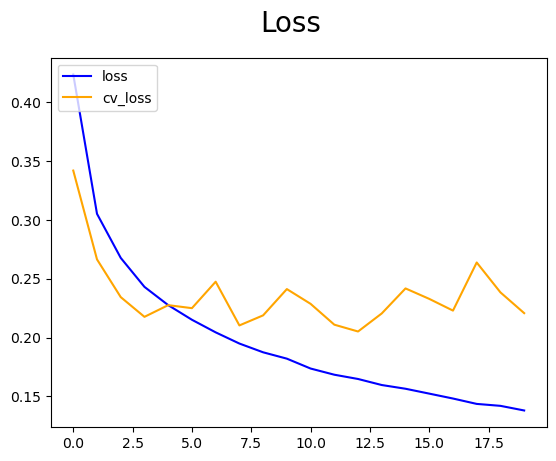

In [88]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='blue', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='cv_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

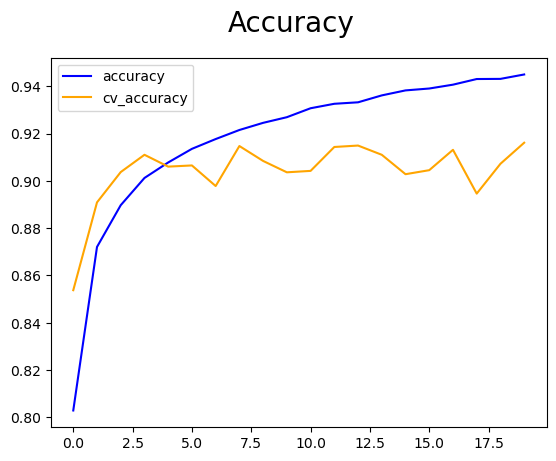

In [90]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='blue', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='cv_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [92]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In [94]:
pre = Precision()
rec = Recall()
acc = BinaryAccuracy()

In [96]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    rec.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/st

In [98]:
print(f'Precision: {pre.result().numpy()}, Recall: {rec.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision: 0.923450767993927, Recall: 0.9132785797119141, Accuracy: 0.9190295338630676


In [101]:
#testing your model using new unseen data
from tensorflow.keras.models import load_model

In [103]:
model.save(os.path.join('model', 'ai_imageclassifier.keras'))
# Save the model in the new Keras format

In [105]:
model = load_model(os.path.join('model','ai_imageclassifier.keras'))

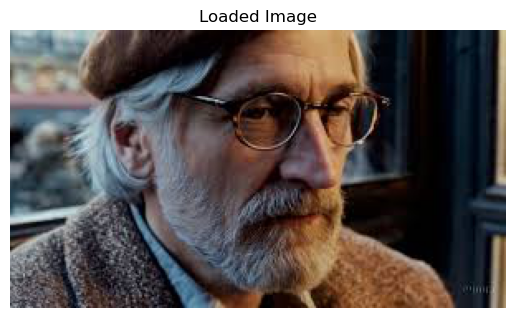

In [107]:
image_path = 'C:/Users/prach/ai1.jpeg'

# Check if the image exists and load it safely
if not os.path.exists(image_path):
    print(f"❌ Image not found at path: {image_path}")
else:
    img = cv2.imread(image_path)
    
    if img is None:
        print("❌ Failed to load the image. It might be corrupted or unreadable.")
    else:
        # Convert from BGR (OpenCV format) to RGB (matplotlib format)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        # Display the image
        plt.imshow(img_rgb)
        plt.axis('off')  # Hide axis for a cleaner display
        plt.title("Loaded Image")
        plt.show()

In [109]:
resize = tf.image.resize(img, (32, 32))

In [111]:
y_pred = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


In [113]:
y_pred

array([[0.00039356]], dtype=float32)

In [115]:
if y_pred > 0.5: 
    print(f'Predicted class: REAL')
else:
    print(f'Predicted class: AI')

Predicted class: AI
